In [1]:
# importing required libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# reading the data
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
# first five rows of the data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# columns in the dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Description of the variables


<b>id</b> : a unique identifier for each trip. This is a <b>nominal</b> data column.

<b>vendor_id</b> :  a code indicating the provider associated with the trip record.This is a <b>nominal</b> data column.

<b>pickup_datetime</b> : the date and the time when the ride started.

<b>dropoff_datetime</b> : the date and time when the ride ended

<b>passenger_count</b> : the number of passengers in the vehicle (driver entered value)

<b>pickup_longitude</b> : date and time when the meter was engaged

<b>pickup_latitude</b> : date and time when the meter was disengaged

<b>dropoff_longitude</b> : the longitude where the meter was disengaged

<b>dropoff_latitude</b> : the latitude where the meter was disengaged

<b>store_and_fwd_flag</b> : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).This column is categorical

<b>trip_duration</b> :  (target) duration of the trip in seconds

In [5]:
# shape of the data
data.shape

(729322, 11)

In [6]:
# statistics of the numerical features in the data
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [7]:
# statistics of the categorical features in the data
data.describe(include = object)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,729322,729322,729322,729322
unique,729322,709359,709308,2
top,id2692012,2016-06-11 20:17:45,2016-06-22 12:06:24,N
freq,1,4,4,725282


In [8]:
# overview of type of variables
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
# checking the missing values in the dataset
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
# looking at the longest trips
print('Longest 5 trip duration: \n {} '.format(data['trip_duration'].nlargest(5)))


Longest 5 trip duration: 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 


In [11]:
print('\zero trip duration row values is {}'.format(len(data[data['trip_duration']==1 ])))

\zero trip duration row values is 13


In [12]:
# dropping the outliers
data=data[data.trip_duration!=data.trip_duration.max()]
data=data[data.trip_duration!=data.trip_duration.min()]

In [13]:
# converting the date time variables to datatime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [14]:
# creating datetime features
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [15]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2


In [16]:
# columns of the data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month'],
      dtype='object')

In [17]:
data.describe(include = object)

,id,store_and_fwd_flag,pickup_day,dropoff_day
count,729308,729308,729308,729308
unique,729308,2,7,7
top,id2692012,N,Friday,Friday
freq,1,725268,111744,111509


In [18]:
# dropping the variables which might not be helpful to predict the trip duration
data = data.drop(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [19]:
PickUpDays = data['pickup_day'].value_counts()
print(PickUpDays )

Friday       111744
Saturday     110249
Thursday     109344
Wednesday    105071
Tuesday      101252
Sunday        97679
Monday        93969
Name: pickup_day, dtype: int64


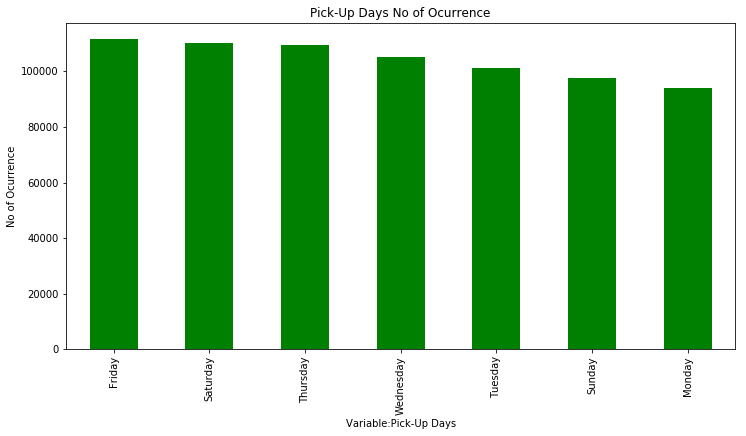

In [20]:
fig = PickUpDays .sort_values(ascending=False).plot.bar(figsize=(12,6), color = 'Green')
fig.set_ylabel('No of Ocurrence')
fig.set_xlabel('Variable:Pick-Up Days')
fig.set_title('Pick-Up Days No of Ocurrence')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))

plt.bar(x = data['pickup_day'], height = data['passenger_count'] , color='orange')

plt.title('Car Manufacturer Prices')
plt.xlabel('Maker')
plt.ylabel('Price')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
        
plt.show()

In [ ]:
DropOffDays = data['dropoff_day'].value_counts()
print(DropOffDays )

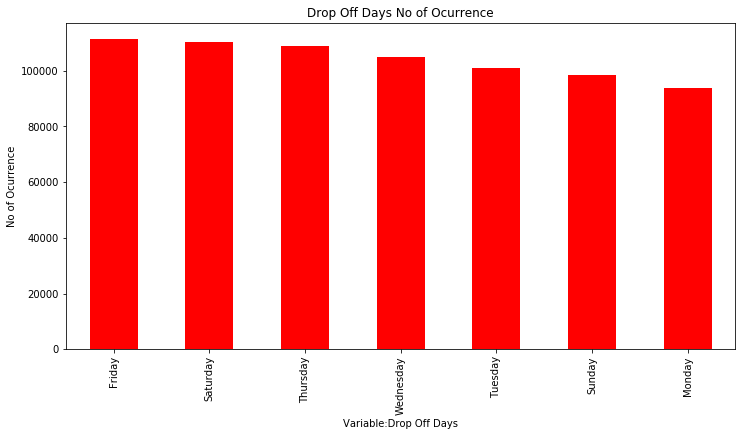

In [32]:
fig = DropOffDays .plot.bar(figsize=(12,6), color = 'Red')
fig.set_ylabel('No of Ocurrence')
fig.set_xlabel('Variable:Drop Off Days')
fig.set_title('Drop Off Days No of Ocurrence')
plt.show()

In [16]:
# converting the categorical variables to numerical variables
data = pd.get_dummies(data)

In [17]:
# separating dependent and independent variables
X = data.drop(['trip_duration'], 1)
y = data['trip_duration']

In [18]:
# creating a training and validation set
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=10)

## Linear Regression Model

In [19]:
# creating the model
lreg = LinearRegression()

In [20]:
# training the model
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# rmse on training set
pred_train = lreg.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_train

3107.261767998848

In [22]:
# rmse on validation set
pred_val = lreg.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, pred_val))
rmse

3114.5711014235185